# Project 2 Part 2 - Web Scraped Data Analysis and Visualizations
 ## 
by Dana Tryon

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
url='https://www.letour.fr/en/rankings/stage-1'  # This is the official web site of the Tour de France
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [3]:
print(soup.prettify())
type(soup)

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Official classifications of Tour de France 2024 - Stage 1
  </title>
  <meta content="Classifications of Tour de France 2024" name="description"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="https://www.letour.fr/img/global/logo.png" name="image"/>
  <meta content="en" name="lang"/>
  <meta content="tdf" name="race"/>
  <meta content="2024" name="year"/>
  <meta content="classements" name="pageKey"/>
  <meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, user-scalable=no" property="viewport"/>
  <meta content="https://www.letour.fr/en/rankings/stage-1" property="og:url"/>
  <meta content="https://www.letour.fr/img/global/logo-og.png" property="og:image"/>
  <meta content="website" property="og:type"/>
  <meta content="Tour de France 2024" property="og:site-name"/>
  <meta content="Official classifications of Tour de France 2024 - 

bs4.BeautifulSoup

# Question 1:  How many riders participated in the 2023 Tour de France and what is the nationality of each rider?  
This will be determined by the national flag associated with each rider at stage 1 of the race.  A list of flags (nationalFlags) is generated by using soup to find them in the span tag in the rankingTables of the web page.  This list of flags is in the order of the corresponding rider's finishing placement in stage 1 of the race.  There were 175 riders that finished stage 1.  A for loop will be used to tally each nationality as the key in a dictionary with the number tally as the value.  This will then be converted to a sorted list for generating a Seaborn bar graph.

In [4]:
ranking_table = soup.find(class_='rankingTables').tbody   # finding the ranking table
flags = ranking_table.findAll('span')    # the flag is within the span tag in the ranking table and using the findAll function to create a list of them
nationalFlags = re.findall('flag--\w+', str(flags))   #  The abbreviation of each nation comes after this text 'flag--', extracting further a list of nations
nationalFlags = [item[6:] for item in nationalFlags]  #  using string slicing to remove the 'flag--' text part and leaving only the 3 letter national abbreviation
nationalFlags = nationalFlags[1::6]  #  These abbreviations are in triplicate with a 'with' text in between and using string slicing to extract every sixth nation
print(len(nationalFlags))   # confirming the length of this list to be the number of riders at the end of stage one
print(nationalFlags)  #  printing the list of nationalities of each rider

175
['gbr', 'gbr', 'slo', 'fra', 'can', 'fra', 'aus', 'den', 'den', 'fra', 'bel', 'esp', 'esp', 'ned', 'nzl', 'esp', 'bel', 'bel', 'bel', 'fra', 'rsa', 'fra', 'col', 'ger', 'fra', 'col', 'fra', 'aus', 'gbr', 'nor', 'usa', 'aus', 'aus', 'aus', 'ita', 'aut', 'ned', 'esp', 'fra', 'esp', 'pol', 'esp', 'esp', 'aut', 'ger', 'usa', 'ita', 'esp', 'usa', 'fra', 'fra', 'fra', 'esp', 'esp', 'bel', 'col', 'den', 'slo', 'lux', 'aut', 'col', 'ger', 'por', 'fra', 'nor', 'den', 'aus', 'aus', 'bel', 'col', 'esp', 'bel', 'ned', 'pol', 'fra', 'fra', 'eri', 'bel', 'bel', 'por', 'fra', 'esp', 'nor', 'usa', 'fra', 'por', 'gbr', 'fra', 'ned', 'can', 'kaz', 'ger', 'fra', 'nzl', 'lux', 'ita', 'lat', 'aus', 'fra', 'sui', 'gbr', 'fra', 'aut', 'esp', 'aut', 'fra', 'den', 'bel', 'bel', 'bel', 'can', 'bel', 'fra', 'bel', 'bel', 'fra', 'aus', 'ger', 'fra', 'ger', 'usa', 'aut', 'ned', 'bel', 'bel', 'fra', 'fra', 'usa', 'ita', 'lux', 'bel', 'ned', 'ned', 'den', 'slo', 'den', 'nor', 'ned', 'nor', 'nor', 'nor', 'ned', '

In [5]:
# creating dictionary to tally all riders' nationalities
flagTally = {}
for index in nationalFlags:    # iterating through the rows of the nationality column
    if index in flagTally:    # If result equals an existing dictianary key, tally one more.
        flagTally[index] += 1
    else:                         # If result does not equal an existing dictionary key, add result as a new key with a value of 1.
        flagTally[index] = 1
# create a new dictionary that sorts the values of the original dictionary in ascending order
sortedFlagTally = {key: value for key, value in sorted(flagTally.items(),key=lambda item: item[1], reverse=True)}
sortedFlagTally

{'fra': 32,
 'bel': 21,
 'ned': 14,
 'esp': 13,
 'aus': 12,
 'den': 11,
 'nor': 8,
 'gbr': 7,
 'ger': 7,
 'ita': 7,
 'usa': 6,
 'aut': 6,
 'col': 5,
 'slo': 3,
 'can': 3,
 'lux': 3,
 'por': 3,
 'nzl': 2,
 'pol': 2,
 'kaz': 2,
 'sui': 2,
 'rsa': 1,
 'eri': 1,
 'lat': 1,
 'svk': 1,
 'crc': 1,
 'ecu': 1}

Text(0, 0.5, 'Nationality')

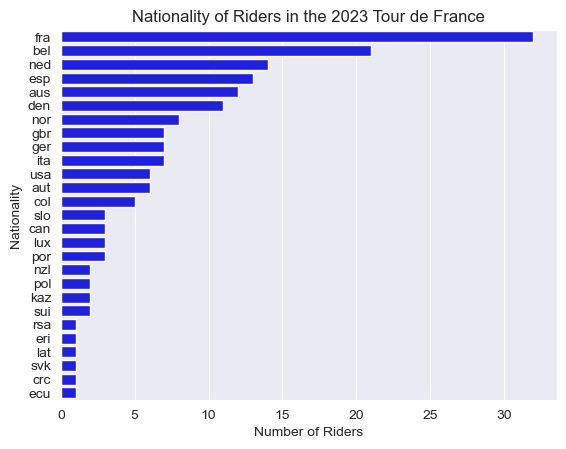

In [13]:
#creating lists for graphing purposes based on the sorted dictionary
x2list = list(sortedFlagTally.keys())
y2list = list(sortedFlagTally.values())

sns.set_style('darkgrid')
ax = sns.barplot(x=y2list, y=x2list, color='b')
ax.set_title('Nationality of Riders in the 2023 Tour de France')
ax.set_xlabel('Number of Riders')
ax.set_ylabel('Nationality')

# Question 2:  How many American riders participated in the 2023 Tour de France?
This will be done by creating a list called flagRank that will hold the finishing place of all riders that are from the usa.  Next, a list of riders called stageOneRankings will be created by finding all participating riders' names in the 'a' tags in the web sites rankingTable.  This list corresponds to the finishing placement of stage 1 of the race.  Next, I created a dictionary called usaRankings that will hold the name of the usa rider as the key and their finishing placement of stage 1 of the race.  A for loop will compare the usa riders placement list with the stageOneRanking of all riders, and when the placement number is reached in the iteration, the rider name and placement are placed into the usaRankings dictionary.  This dictionary contains all usa riders and there placement of stage one of the race.

In [7]:
#print(ranking_table)
flagRank = []  #  creating a list to hold the race rank of any rider with usa as nationality
rank = 0  # creating a variable to show the place in stage one that the rider finished
for index in nationalFlags:  #  iterating through the nationalFlags list, this list is in the order of the race results
    rank +=1  # each iteration of the loop is an increment in the race standings
    #print(index)
    #print(rank)
    if 'usa' in index:  # looking for usa riders and associating that rider with place finished in the race
        #print('true')
        flagRank.append(rank)  # adding the usa riders' rank in a list
#flagRank
stageOneRankings = []  # creating a list to hold the name of the rider in the order with which they placed in the race
for item in ranking_table.find_all('a'):  # iterating through each row to find the rider name within the <a> tag
    stageOneRankings.append(item.text)  # appending the list with the rider name
stageOneRankings = [item.strip() for item in stageOneRankings]  # removing any unnecessary white space from the name of the rider
stageOneRankings
usaRankings = {}  # creating a dictionary to hold the usa rider name as the key and their race rank as the value
placeHolder = 0  #  creating a variable to hold the race rank for the following loop
for x in stageOneRankings:  # iterating through the names of the riders in the order they finished in the race
    placeHolder +=1
    #print(placeHolder)
    #print(x)
    for y in flagRank:  # iterating through the list of finishing rankings of the usa riders
        #print(y)
        if placeHolder == y:  #  if the race ranking place holder equals the value of the usa rider list ranking
            usaRankings[x] = placeHolder  # update the dictionary to include the rider name and race ranking
usaRankings
print('The 2023 Tour de France riders from the USA at stage 1 are: ')
for names, rank in usaRankings.items():  # printing the names only in the usaRankings dictionary
    print(names)
    




The 2023 Tour de France riders from the USA at stage 1 are: 
S. KUSS
N. POWLESS
M. JORGENSON
K. VERMAERKE
Q. SIMMONS
G. CRADDOCK


# Question 3:  Where did each American finish in each of the 21 stages of the Tour de France?
This will be done by bringing up the 21 web pages corresponding to the 21 stages of the race and using the previous code to extract the information.  A urlList is created for the 21 web pages for each stage of the race.  A for loop is created to open each page one by one.  A panda data frame, usStageFinishes was created to keep a table of each stage with the us rider and their stage finishing rank.  The previous cell code is repeated so as to create a dictonary to keep track of the us riders and there placement.  After the dictionary is created, the values are saved into the data frame because the next iteration will clear the results of the dictionary for the next stage.  Once all stages have finished, the data frame is used to create a Seaborn line graph to follow each us riders progress through the stages of the Tour de France.

In [8]:
urlList = []  # creating a list to hold all the url's
for index in range(21):  # creating a loop to name each url and add to the list
    baseUrl = 'https://www.letour.fr/en/rankings/stage-'  # luckily each web page starts the same way and only need to put the stage number at the end
    baseUrl = baseUrl + str(index+1)
    #print(baseUrl)
    urlList.append(baseUrl)
print(urlList)

['https://www.letour.fr/en/rankings/stage-1', 'https://www.letour.fr/en/rankings/stage-2', 'https://www.letour.fr/en/rankings/stage-3', 'https://www.letour.fr/en/rankings/stage-4', 'https://www.letour.fr/en/rankings/stage-5', 'https://www.letour.fr/en/rankings/stage-6', 'https://www.letour.fr/en/rankings/stage-7', 'https://www.letour.fr/en/rankings/stage-8', 'https://www.letour.fr/en/rankings/stage-9', 'https://www.letour.fr/en/rankings/stage-10', 'https://www.letour.fr/en/rankings/stage-11', 'https://www.letour.fr/en/rankings/stage-12', 'https://www.letour.fr/en/rankings/stage-13', 'https://www.letour.fr/en/rankings/stage-14', 'https://www.letour.fr/en/rankings/stage-15', 'https://www.letour.fr/en/rankings/stage-16', 'https://www.letour.fr/en/rankings/stage-17', 'https://www.letour.fr/en/rankings/stage-18', 'https://www.letour.fr/en/rankings/stage-19', 'https://www.letour.fr/en/rankings/stage-20', 'https://www.letour.fr/en/rankings/stage-21']


In [9]:
#print(urlList)
usStageFinishes = pd.DataFrame(columns=['stage','name','rank']) # creating a data frame to track the US riders' results
stageNumber = 0  # creating a variable to hold the number of the stage
dfPlaceHolder = 0  # data frame row positioning variable
for urlIndex in urlList:  # creating a loop to open each of the url's in the list
    stageNumber += 1
    time.sleep(5)  # creating a 5 second time delay so as to be kind to the web site and not blast it with all the requests at once
    #print(urlIndex)
    response = requests.get(urlIndex)  # all of the following code in this cell is repeated from previous cells and documention will not be repeated
    status = response.status_code
    if status == 200:
        page = response.text
        soup = bs(page)
    else:
        print(f"Oops! Received status code {status}")

    ranking_table = soup.find(class_='rankingTables').tbody
    flags = ranking_table.findAll('span')
    nationalFlags = re.findall('flag--\w+', str(flags))
    nationalFlags = [item[6:] for item in nationalFlags]
    nationalFlags = nationalFlags[1::6]
    
    flagRank = []
    rank = 0
    for index in nationalFlags:
        rank +=1
        #print(index)
        #print(rank)
        if 'usa' in index:
            #print('true')
            flagRank.append(rank)
                
    stageOneRankings = []
    for item in ranking_table.find_all('a'):
        stageOneRankings.append(item.text)
    stageOneRankings = [item.strip() for item in stageOneRankings]
    #stageOneRankings
    usaRankings = {}
    placeHolder = 0
    for x in stageOneRankings:
        placeHolder +=1
        for y in flagRank:
            #print(y)
            #print(x)
            #print(placeHolder)
            #print(stageNumber)
            if placeHolder == y:
                usaRankings[x] = placeHolder
                
    print(f"The American riders' results for stage {stageNumber} are:")
    print(usaRankings)  # for each stage, the dictionary containing the American riders with corresponding stage placement will be printed
    for z in usaRankings:  # iterating through each stage dictionary of rider name and stage rank
        dfPlaceHolder +=1
        #print(usaRankings[z]) 
        #print(z)
        usStageFinishes.loc[dfPlaceHolder] = [stageNumber, z, usaRankings[z]]  # updating a data frame containing each rider and stage rank
    




The American riders' results for stage 1 are:
{'S. KUSS': 31, 'N. POWLESS': 46, 'M. JORGENSON': 49, 'K. VERMAERKE': 84, 'Q. SIMMONS': 121, 'G. CRADDOCK': 128}
The American riders' results for stage 2 are:
{'S. KUSS': 30, 'N. POWLESS': 75, 'M. JORGENSON': 122, 'Q. SIMMONS': 123, 'G. CRADDOCK': 126, 'K. VERMAERKE': 142}
The American riders' results for stage 3 are:
{'G. CRADDOCK': 82, 'S. KUSS': 95, 'N. POWLESS': 155, 'Q. SIMMONS': 156, 'K. VERMAERKE': 157, 'M. JORGENSON': 159}
The American riders' results for stage 4 are:
{'S. KUSS': 62, 'G. CRADDOCK': 73, 'K. VERMAERKE': 146, 'N. POWLESS': 149, 'M. JORGENSON': 151, 'Q. SIMMONS': 170}
The American riders' results for stage 5 are:
{'S. KUSS': 12, 'M. JORGENSON': 22, 'K. VERMAERKE': 49, 'G. CRADDOCK': 56, 'N. POWLESS': 106, 'Q. SIMMONS': 136}
The American riders' results for stage 6 are:
{'N. POWLESS': 11, 'S. KUSS': 14, 'M. JORGENSON': 80, 'G. CRADDOCK': 84, 'K. VERMAERKE': 113, 'Q. SIMMONS': 163}
The American riders' results for stage 7

In [10]:
print(usStageFinishes)

     stage          name  rank
1        1       S. KUSS    31
2        1    N. POWLESS    46
3        1  M. JORGENSON    49
4        1  K. VERMAERKE    84
5        1    Q. SIMMONS   121
..     ...           ...   ...
103     20    N. POWLESS   100
104     21       S. KUSS    12
105     21  K. VERMAERKE    61
106     21    N. POWLESS    66
107     21   G. CRADDOCK    84

[107 rows x 3 columns]


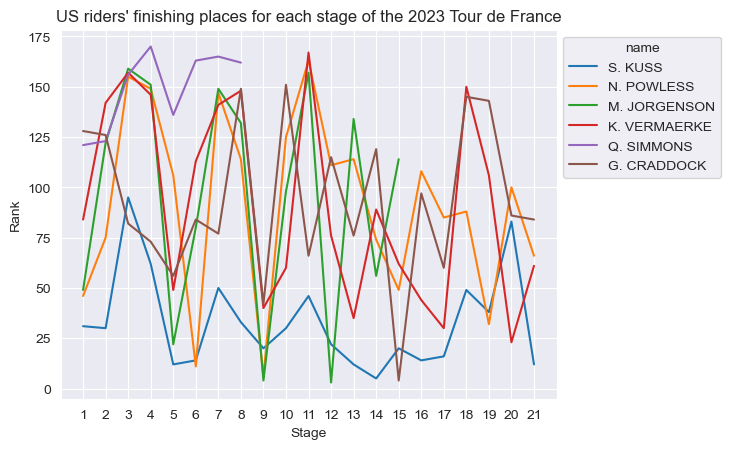

In [11]:
sns.set_style('darkgrid')
ax = sns.lineplot(data = usStageFinishes, x='stage', y='rank', hue='name')
ax.set_title("US riders' finishing places for each stage of the 2023 Tour de France")
ax.set_xlabel('Stage')
ax.set_ylabel('Rank')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
locs, labels = plt.xticks()
plt.xticks(ticks=range(int(min(usStageFinishes['stage'])), int(max(usStageFinishes['stage'])) + 1, 1))
plt.show()

# Question 4:  What were the final general classification standings for each of these American riders at the end of the 21 stages?
The total race times for all 21 stages are used to determine the general classification placement.  The American rider Sepp Kuss did really well and placed in 12th place.  He is a climbing specialist and team mate of the Tour de France winner, the Norwegian Jonas Vingegaard from the team Jumbo-Visma.  This is a really big deal because road cycling is a team sport and the prize money is split with the entire team.

Two American riders did not finish the 2023 Tour de France.
Q. Simmons left the race between stage 8 and 9.  M. Jorgenson left the race between stage 15 and 16.
Rider S. Kuss finished in 12th place, K. Vermaerke finished in 61st place, N. Powless finished in 66th place, and G. Graddoock finished in 84th place.


Text(0, 0.5, 'Rider')

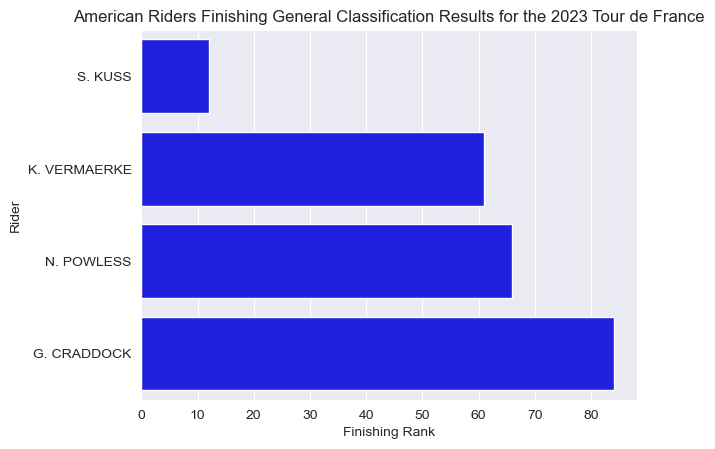

In [12]:
print('Two American riders did not finish the 2023 Tour de France.')
print('Q. Simmons left the race between stage 8 and 9.  M. Jorgenson left the race between stage 15 and 16.')
print('Rider S. Kuss finished in 12th place, K. Vermaerke finished in 61st place, N. Powless finished in 66th place, and G. Graddoock finished in 84th place.')

#creating lists for graphing purposes based on the sorted dictionary
x3list = list(usaRankings.keys())
y3list = list(usaRankings.values())
sns.set_style('darkgrid')
ax = sns.barplot(x=y3list, y=x3list, color='b')
ax.set_title('American Riders Finishing General Classification Results for the 2023 Tour de France')
ax.set_xlabel('Finishing Rank')
ax.set_ylabel('Rider')